## k-近邻算法
- 工作原理：存在一个样本集合，并且样本集中每个数据都存在标签，输入没有标签的新数据后，将新数据的每个特征与样本集中对应的特征进行比较，然后算法提取样本集中特征最相似数据(最近邻)分类标签，统计k个最相似数据中出现最多的分类作为新数据的分类。
- 优点：精度高，对异常值不敏感、无数据输入假定
- 缺点：计算复杂度高、空间复杂度高
- 适用数据范围：数值型和标称型
- https://blog.csdn.net/weixin_39778570/article/details/81455344

### 1.简单实例

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
# 创建数据集
def create_datasets():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [7]:
X, y = create_datasets()
X, y

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [9]:
test_data = np.array([2, 1])
test_data

array([2, 1])

In [15]:
# 计算距离
distances = (((test_data - X)**2).sum(axis=1))**0.5
distances

array([1.00498756, 1.        , 2.23606798, 2.19317122])

In [17]:
# 排序
sort_index=distances.argsort()
sort_index

array([1, 0, 3, 2])

In [19]:
k=2
topK_k=[y[i] for i in sort_index[:k]]
topK_k

['A', 'A']

In [20]:
sort_index[:2]

array([1, 0])

In [22]:
import collections
votes=collections.Counter(topK_k)
votes

Counter({'A': 2})

In [23]:
votes.most_common(1)[0][0]

'A'

In [8]:
# 利用欧氏距离简单进行分类
def k_classify0(trains_sets, predict_sets, k):
    # 0.获得训练集数据和特征
    X, y = trains_sets
    # 1.求测试集与训练集的距离
    distances = (((predict_sets - X)**2).sum(axis=1))**0.5
#     print(distances[:5])
    # 2.排序
    nearset_index = np.argsort(distances)
    # 3.取出最近的k值
    topK_k = [y[i] for i in nearset_index[:k]]
    # 4.统计数目
    votes = collections.Counter(topK_k).most_common(1)
    # 5.返回预测标签
    return votes[0][0]

In [35]:
np.random.seed(2019)
X_trains=np.random.random((20,2))
X_trains

array([[0.90348221, 0.39308051],
       [0.62396996, 0.6378774 ],
       [0.88049907, 0.29917202],
       [0.70219827, 0.90320616],
       [0.88138193, 0.4057498 ],
       [0.45244662, 0.26707032],
       [0.16286487, 0.8892147 ],
       [0.14847623, 0.98472349],
       [0.03236122, 0.51535075],
       [0.20112905, 0.88601087],
       [0.51361992, 0.57830159],
       [0.29928265, 0.8371974 ],
       [0.52664983, 0.10484424],
       [0.27812941, 0.04659494],
       [0.50907615, 0.47242629],
       [0.90448733, 0.94349222],
       [0.70339235, 0.84629795],
       [0.92799464, 0.81936188],
       [0.84518556, 0.79145187],
       [0.17100016, 0.28997792]])

In [36]:
y_trains=np.random.choice([1,2],20)
y_trains

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1])

In [47]:
y_predict=np.array([0.23452664, 0.28985187])
y_predict

array([0.23452664, 0.28985187])

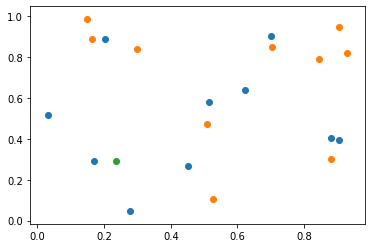

In [45]:
# 画图看效果
plt.scatter(X_trains[y_trains == 1, 0], X_trains[y_trains == 1, 1])
plt.scatter(X_trains[y_trains == 2, 0], X_trains[y_trains == 2, 1])
# 预测点
plt.scatter(y_predict[0, 0], y_predict[0, 1])

In [60]:
trains=X_trains,y_trains
k_classify0(trains,y_predict,5)

1

In [3]:
## 使用鸢尾花数据集
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

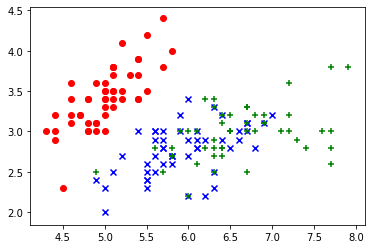

In [70]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", marker='x')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", marker='+')

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.9, 3. , 5.1, 1.8],
       [5.2, 4.1, 1.5, 0.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.5, 2.4, 3.7, 1. ],
       [4.4, 2.9, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.3, 1.7, 0.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.8, 4.5, 1.3],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 2.4, 3.8, 1.1],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 3. , 4.2, 1.2]])

In [19]:
# k近邻算法可以认为是一个没有训练过程的算法
# 对于knn来说，训练集就是模型
# 参数k，X_train训练集, y_train分类标签集, x新的点


class KNNClassifier:
    def __init__(self, k):
        """初始化kNN分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        # 私有成员变量_
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[
            0], "the size of X_train must be equal to the size of y_train."
        assert self.k <= X_train.shape[
            0], "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待测预测数据集X_predict,返回表示X_predict的结果向量集"""
        assert self._X_train is not None and self._y_train is not None, "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[
            1], "the feature number of X_predict must be similar to X_train."

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待测数据x,返回x的预测结果集"""
        assert x.shape[0] == self._X_train.shape[
            1], "the feature number of x must be equal to X_train"

        # 欧拉距离
        distances = [(np.sum((x_train - x)**2))**0.5
                     for x_train in self._X_train]
        # 求出距离最小的索引
        nearest = np.argsort(distances)

        # 前k个距离最小的标签的点集
        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        # 投票统计
        votes = collections.Counter(topK_y)

        # 返回票数最多的标签
        return votes.most_common(1)[0][0]

    def _accuracy_score(self, y_true, y_predict):
        """计算 y_true 和 y_predict 之间的准确率"""

        assert y_true.shape[0] == y_predict.shape[
            0], "the size of y_true must be equal to the size of y_predict"

        return sum(y_true == y_predict) / len(y_true)

    def score(self, X_test, y_test):
        """根据测算数据集 X_test 和 y_test 确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return self._accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "KNN(k=%d)" % self.k

### 下面的KNNClassifier是模仿sklearn中的api实现的一个简单类

- init构造器传入的是一个k值，即要统一分析的最近的k个点
- fit函数需要在对象创建后使用，传入训练数据集，X_train,y_train
- predict方法传入的是一个测试数据集，返回的是一个测试结果集(这里统一返回np.array)
（在sklearn该方法在metrics模块中所以设置为私有方法）_accuracy_score是用来计算准确率的，传入的连个参数分别为 真实结果集 和 测试结果集
- score方法用来计算该模型的准确率，传入的是 测试数据集 和 测试数据的真是结果集，返回该模型的准确度

In [26]:
my_knn_clf = KNNClassifier(k=3)
# 传入训练数据
my_knn_clf.fit(X_train, y_train)
# 进行预测
y_predict = my_knn_clf.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 0, 2, 1, 2, 1, 2, 1])

In [27]:
y_test

array([1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       0, 0, 2, 1, 2, 1, 2, 1])

In [28]:
# （每次预测的结果可能不一样，受到随机分类的随机种子的影响）
sum(y_predict == y_test)/len(y_test)

0.9666666666666667

In [29]:
# 数据一样，结果一样
knn_clf.score(X_test, y_test)

0.9666666666666667

In [31]:
# n_neighbors参数即k值
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 模型拟合，传入训练数据
knn_clf.fit(X_train, y_train)
# 返回结果
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
# 对测试数据进行预测,返回预测结果集
y_predict = knn_clf.predict(X_test)

# 导入计算正确率的模块
from sklearn.metrics import accuracy_score
# 传入真实结果和测试结果，返回正确率
accuracy_score(y_test, y_predict)

0.9666666666666667

In [33]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9666666666666667

### 使用scikit-learn，对手写数字进行预测分类

In [3]:
from sklearn import datasets

In [7]:
# 加载手写数字的数据集
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [10]:
X, y = digits.data, digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# 分类标签
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
some_digits=X[666]
y[666]

0

In [16]:
img_some_digits=some_digits.reshape((8,8))
img_some_digits

array([[ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0., 13., 15.,  9., 15.,  2.,  0.],
       [ 0.,  4., 16., 12.,  0., 10.,  6.,  0.],
       [ 0.,  8., 16.,  9.,  0.,  8., 10.,  0.],
       [ 0.,  7., 15.,  5.,  0., 12., 11.,  0.],
       [ 0.,  7., 13.,  0.,  5., 16.,  6.,  0.],
       [ 0.,  0., 16., 12., 15., 13.,  1.,  0.],
       [ 0.,  0.,  6., 16., 12.,  2.,  0.,  0.]])

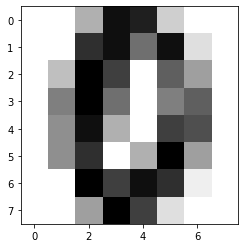

In [17]:
import matplotlib
plt.imshow(img_some_digits, cmap = matplotlib.cm.binary)

In [19]:
# 导入分类模块
from sklearn.model_selection import train_test_split
# 进行训练数据和测试数据的分类，随机种子为666可以复现结果
# 导入计算正确率的模块
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [47]:
def test_knn(X_train, y_train, X_test, y_test):
    # 创建模型
    knn_clf = KNeighborsClassifier(n_neighbors=3,
                                   weights='uniform',
                                   algorithm='auto',
                                   leaf_size=30,
                                   p=2,
                                   metric='minkowski',
                                   metric_params=None,
                                   n_jobs=-1)
    # 模型拟合，传入训练数据
    knn_clf.fit(X_train, y_train)
    # 对测试数据进行预测,返回预测结果集
    return knn_clf.score(X_test, y_test)


test_knn(X_train, y_train, X_test, y_test)

0.9888888888888889

In [23]:
# 直接传入测试数据进行模型评估
knn_clf.score(X_test, y_test)

0.9888888888888889

In [29]:
# 没有使用随机种子的完整代码，算正确率

# 训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
# 正确率
knn_clf.score(X_test, y_test)

0.9916666666666667

In [45]:
## 循环查找最好的参数
# weights参数默认值'uniform'不考虑距离，'distance'为考虑距离
def get_best_knn(X_train, y_train, X_test, y_test):
    """
    传入测试集，获得最好的knn参数
    """
    %time
    best_method = ""
    best_score = 0.0
    best_k = -1
    best_p = -1
    for method in ['uniform', 'distance']:
        for k in range(1, 11):
            for p in range(1, 6):
                knn_clf = KNeighborsClassifier(n_neighbors=k,
                                               weights=method,
                                               p=p)
                knn_clf.fit(X_train, y_train)
                score = knn_clf.score(X_test, y_test)
                if score > best_score:
                    best_k = k
                    best_score = score
                    best_method = method
                    best_p = p

    print("best_k = ", best_k)
    print("best_p = ", best_p)
    print("best_method = ", best_method)
    print("best_score = ", best_score)

    return best_k, best_p, best_method, best_score


get_best_knn(X_train, y_train, X_test, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
best_k =  4
best_p =  2
best_method =  uniform
best_score =  0.9916666666666667


(4, 2, 'uniform', 0.9916666666666667)

In [50]:
### 莺尾花测试集衡量算法
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
test_knn(X_train, y_train, X_test, y_test)

0.9666666666666667

In [52]:
get_best_knn(X_train, y_train, X_test, y_test)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 44.1 µs
best_k =  4
best_p =  1
best_method =  uniform
best_score =  1.0


(4, 1, 'uniform', 1.0)

### 网格搜索

In [75]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(algorithm='auto',
                                                          leaf_size=30,
                                                          metric='minkowski',
                                                          metric_params=None,
                                                          n_jobs=1,
                                                          n_neighbors=5,
                                                          p=2,
                                                          weights='uniform'),
                           param_grid=[{
                               'weights': ['uniform'],
                               'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                           }, {
                               'weights': ['distance'],
                               'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                               'p': [1, 2, 3, 4, 5]
                           }],
                           scoring=None,
                           n_jobs=-1,
                           iid=True,
                           refit=True,
                           cv='warn',
                           verbose=0,
                           pre_dispatch='2*n_jobs',
                           error_score='raise',
                           return_train_score='warn')
grid_search.fit(X_train, y_train)
grid_search.best_score_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9583333333333334

#### 很奇怪同样的数据集为什么没有搜素得到最优解，仔细查看是否GridSearchCV的函数有问题

In [69]:
# 最优参数
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=1,
                     weights='distance')

In [70]:
# 最优搜索参数
grid_search.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [71]:
test_knn(X_train, y_train, X_test, y_test)

0.9666666666666667

In [80]:
# 限定半径最近邻法类
from sklearn.neighbors import RadiusNeighborsClassifier
rnc_clf = RadiusNeighborsClassifier(radius=1.0,
                                    weights='uniform',
                                    algorithm='auto',
                                    leaf_size=30,
                                    p=1,
                                    metric='minkowski',
                                    outlier_label=None,
                                    metric_params=None,
                                    n_jobs=-1)
rnc_clf.fit(X_train, y_train)
rnc_clf.score(X_test, y_test)

0.9666666666666667

In [83]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors=4,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             n_jobs=None)
kn_reg.fit(X_train, y_train)
kn_reg.score(X_test, y_test)

0.9653942953020135

In [88]:
from sklearn.neighbors import RadiusNeighborsRegressor
rd_reg = RadiusNeighborsRegressor(radius=1.0,
                                  weights='uniform',
                                  algorithm='auto',
                                  leaf_size=30,
                                  p=1,
                                  metric='minkowski',
                                  metric_params=None,
                                  n_jobs=None)
rd_reg.fit(X_train, y_train)
rd_reg.score(X_test, y_test)

0.9565939284457923

In [92]:
### 最近邻算法
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5,
                      radius=1.0,
                      algorithm='auto',
                      leaf_size=30,
                      metric='minkowski',
                      p=2,
                      metric_params=None,
                      n_jobs=None)
nn.fit(X_train, y_train)
nn.predict(X_test)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

### 归一化数据

In [4]:
# 获得原始数据
def get_data():
    dating_data = pd.read_csv("datasets/datingTestSet.txt",
                              sep="\t",
                              header=None,
                              names=['A', 'B', 'C', 'D'])
    dating_data.columns = [
        'air_mileage', 'play_games', 'eating_icecream', 'target'
    ]
    return dating_data


dating_data = get_data()
dating_data.head()

,air_mileage,play_games,eating_icecream,target
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [99]:
dating_data.shape

(1000, 4)

In [12]:
# 方法1， 似乎不能设置顺序
def get_factor_code0(dating_data):
    labels = dating_data.target.astype('category')
    dating_data['l1'] = labels.values.codes
    return dating_data


factor_data0 = get_factor_code0(get_data())
factor_data0.head()

,air_mileage,play_games,eating_icecream,target,l1
0,40920,8.326976,0.953952,largeDoses,1
1,14488,7.153469,1.673904,smallDoses,2
2,26052,1.441871,0.805124,didntLike,0
3,75136,13.147394,0.428964,didntLike,0
4,38344,1.669788,0.134296,didntLike,0


In [11]:
# 方法2，可以根据顺序来操作
def get_factor_code1(dating_data):
    labels = pd.Categorical(
        dating_data.target,
        categories=['didntLike', 'smallDoses', 'largeDoses'])
    dating_data['l2'] = labels.codes
    return dating_data


factor_data1 = get_factor_code1(get_data())
factor_data1.head()

,air_mileage,play_games,eating_icecream,target,l2
0,40920,8.326976,0.953952,largeDoses,2
1,14488,7.153469,1.673904,smallDoses,1
2,26052,1.441871,0.805124,didntLike,0
3,75136,13.147394,0.428964,didntLike,0
4,38344,1.669788,0.134296,didntLike,0


In [10]:
# 方法3， 使用map+dict
def get_factor_code2(dating_data):
    target_mapping = {'didntLike': 0, 'smallDoses': 1, 'largeDoses': 2}
    dating_data['l3'] = dating_data['target'].map(target_mapping)
    return dating_data


factor_data2 = get_factor_code2(get_data())
factor_data2.head()

,air_mileage,play_games,eating_icecream,target,l3
0,40920,8.326976,0.953952,largeDoses,2
1,14488,7.153469,1.673904,smallDoses,1
2,26052,1.441871,0.805124,didntLike,0
3,75136,13.147394,0.428964,didntLike,0
4,38344,1.669788,0.134296,didntLike,0


In [14]:
# 方法4 sklearn 方法
def get_factor_code3(dating_data):
    from sklearn import preprocessing
    dating_data['l4'] = preprocessing.LabelEncoder().fit_transform(
        dating_data.target)
    return dating_data


factor_data3 = get_factor_code3(get_data())
factor_data3.head()

,air_mileage,play_games,eating_icecream,target,l4
0,40920,8.326976,0.953952,largeDoses,1
1,14488,7.153469,1.673904,smallDoses,2
2,26052,1.441871,0.805124,didntLike,0
3,75136,13.147394,0.428964,didntLike,0
4,38344,1.669788,0.134296,didntLike,0


In [19]:
def get_analylze_data(dating_data):
    from sklearn.model_selection import train_test_split
    X, y = np.array(dating_data.iloc[:, :3]), np.array(dating_data.iloc[:, -1])
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    return X_train, X_test, y_train, y_test

In [20]:
## 未标准化的数据训练
X_train, X_test, y_train, y_test = get_analylze_data(get_factor_code0(get_data()))
X_train

array([[4.1611000e+04, 2.3045300e-01, 1.1519960e+00],
       [2.0375000e+04, 0.0000000e+00, 1.6797290e+00],
       [3.0832000e+04, 1.2547439e+01, 1.4024430e+00],
       ...,
       [9.1940000e+03, 7.3313190e+00, 1.2779880e+00],
       [6.7736000e+04, 1.3516711e+01, 1.2201530e+00],
       [9.1710000e+03, 4.7119600e+00, 1.9416700e-01]])

In [22]:
def KNN(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    knn_clf = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform',
                                   algorithm='auto',
                                   leaf_size=30,
                                   p=2,
                                   metric='minkowski',
                                   metric_params=None,
                                   n_jobs=1)
    knn_clf.fit(X_train, y_train)
    return knn_clf.score(X_test, y_test)


X_train, X_test, y_train, y_test = get_analylze_data(
    get_factor_code0(get_data()))
KNN(X_train, X_test, y_train, y_test)

0.8

In [53]:
# 方差标准化 数据
def get_standard_scaler_data(X_train, X_test):
    # 导入标准化模块
    from sklearn.preprocessing import StandardScaler
    # 使用该类
    standarScaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    # 传入训练数据作为标准
    standarScaler.fit(X_train)
    # 获得归一化的训练数据
    X_train = standarScaler.transform(X_train)
    # 获得归一化的测试数据
    X_test = standarScaler.transform(X_test)
    return X_train, X_test


X_train, X_test, y_train, y_test = get_analylze_data(
    get_factor_code0(get_data()))
X_train, X_test = get_standard_scaler_data(X_train, X_test)
print(X_train, X_test)
KNN(X_train, X_test, y_train, y_test)

[[ 0.34755921 -1.49646243  0.64121079]
 [-0.61267489 -1.55079989  1.68855454]
 [-0.13983782  1.40770353  1.1382502 ]
 ...
 [-1.11824926  0.17781838  0.89125567]
 [ 1.52886058  1.63624375  0.7764758 ]
 [-1.11928926 -0.43978833 -1.25970543]] [[ 8.15829332e-01  9.08179105e-01  7.12136753e-01]
 [-1.15605091e+00 -8.26589830e-02  1.18761339e+00]
 [-1.38087121e+00  1.51151518e-01  5.35693090e-01]
 [ 5.55151729e-01 -8.21738111e-01 -6.70794486e-01]
 [-1.09690671e+00 -1.03557216e+00  3.59747564e-01]
 [-1.72982085e-01 -1.18093436e+00 -2.87054426e-01]
 [-3.70265066e-01  4.14780389e-01 -3.82367266e-01]
 [-2.19691533e-01  1.17972094e+00 -7.35304207e-01]
 [ 8.82750903e-01  1.70143092e-01  1.49528735e+00]
 [-6.20135739e-01  8.32413227e-01  9.51607634e-01]
 [-9.96569572e-01 -6.83310602e-01  1.44539229e+00]
 [ 1.96810121e+00  1.95212079e+00  5.97206051e-01]
 [ 1.95987166e+00  9.79782192e-01 -5.62801978e-01]
 [ 1.20677791e+00 -6.97230667e-01 -1.07394601e+00]
 [-3.00630459e-01 -3.26487536e-01  5.26923102e

0.935

In [163]:
standarScaler.mean_

array([3.39245750e+04, 6.57716565e+00, 8.28904280e-01])

In [54]:
# 最值归一化数据
def get_normalizer_data(X_train, X_test):
    from sklearn.preprocessing import MinMaxScaler
    minMaxScaler = MinMaxScaler()
    # minMaxScaler.fit(X_train)
    X_train = minMaxScaler.fit_transform(X_train)
    X_test = minMaxScaler.fit_transform(X_test)
    return X_train, X_test


X_train, X_test, y_train, y_test = get_analylze_data(
    get_factor_code0(get_data()))
X_train, X_test = get_normalizer_data(X_train, X_test)
# print(X_train, X_test)
KNN(X_train, X_test, y_train, y_test)

[[0.45589605 0.01101626 0.67921771]
 [0.2232314  0.         0.99068203]
 [0.33779979 0.59980064 0.82702978]
 ...
 [0.10073077 0.35045636 0.75357731]
 [0.74212527 0.6461344  0.7194435 ]
 [0.10047878 0.2252441  0.11391374]] [[0.64247212 0.59169798 0.70141989]
 [0.10333061 0.35327508 0.84358767]
 [0.04186139 0.40953632 0.64866313]
 [0.57119897 0.17543232 0.28792266]
 [0.11950152 0.12397796 0.59605532]
 [0.37211631 0.08899982 0.40266116]
 [0.3181762  0.47297268 0.37416257]
 [0.35934525 0.65703841 0.26863422]
 [0.66076948 0.41410622 0.93558236]
 [0.24985782 0.57346663 0.77302181]
 [0.14693519 0.20874178 0.92066371]
 [0.95752046 0.84289906 0.66705554]
 [0.95527038 0.60892765 0.32021248]
 [0.7493633  0.20539223 0.16738013]
 [0.33721534 0.29460323 0.6460409 ]
 [0.43975472 0.8290784  0.73681971]
 [0.38239003 0.34933996 0.3408699 ]
 [0.38101773 0.63043628 0.58358563]
 [0.42086393 0.57050425 0.65872125]
 [0.40923027 0.25200458 0.25734777]
 [0.45832406 0.75152318 0.54697645]
 [0.67680439 0.4764283

0.935

In [57]:
X_train, X_test, y_train, y_test = get_analylze_data(
    get_factor_code0(get_data()))
print(X_train)
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
minMaxScaler.fit(X_train).transform(X_train)

[[4.1611000e+04 2.3045300e-01 1.1519960e+00]
 [2.0375000e+04 0.0000000e+00 1.6797290e+00]
 [3.0832000e+04 1.2547439e+01 1.4024430e+00]
 ...
 [9.1940000e+03 7.3313190e+00 1.2779880e+00]
 [6.7736000e+04 1.3516711e+01 1.2201530e+00]
 [9.1710000e+03 4.7119600e+00 1.9416700e-01]]


array([[0.45589605, 0.01101626, 0.67921771],
       [0.2232314 , 0.        , 0.99068203],
       [0.33779979, 0.59980064, 0.82702978],
       ...,
       [0.10073077, 0.35045636, 0.75357731],
       [0.74212527, 0.6461344 , 0.7194435 ],
       [0.10047878, 0.2252441 , 0.11391374]])

### KDTree 构建

In [96]:
# k近邻算法可以认为是一个没有训练过程的算法
# 对于knn来说，训练集就是模型
# 参数k，X_train训练集, y_train分类标签集, x新的点
import numpy as np
import collections


class KNN:
    def __init__(self, n_neighbors=3, p=2):
        """初始化kNN分类器"""
        assert n_neighbors >= 1, "n_neighbors must be valid"
        self.n_neighbors = n_neighbors
        self.p = p
        # 私有成员变量_
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[
            0], "the size of X_train must be equal to the size of y_train."
        assert self.n_neighbors <= X_train.shape[
            0], "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待测预测数据集X_predict,返回表示X_predict的结果向量集"""
        assert self._X_train is not None and self._y_train is not None, "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[
            1], "the feature number of X_predict must be similar to X_train."

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待测数据x,返回x的预测结果集"""
        assert x.shape[0] == self._X_train.shape[
            1], "the feature number of x must be equal to X_train"

        # 欧拉距离
        distances = [(np.sum((x_train - x)**self.p))**(self.p / 2)
                     for x_train in self._X_train]
        # 求出距离最小的索引
        nearest = np.argsort(distances)

        # 前k个距离最小的标签的点集
        topK_y = [self._y_train[i] for i in nearest[:self.n_neighbors]]
        # 投票统计
        votes = collections.Counter(topK_y)

        # 返回票数最多的标签
        return votes.most_common(1)[0][0]

    def _accuracy_score(self, y_true, y_predict):
        """计算 y_true 和 y_predict 之间的准确率"""

        assert y_true.shape[0] == y_predict.shape[
            0], "the size of y_true must be equal to the size of y_predict"

        return sum(y_true == y_predict) / len(y_true)

    def score(self, X_test, y_test):
        """根据测算数据集 X_test 和 y_test 确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return self._accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "KNN(n_neighbors=%d)" % self.n_neighbors

In [163]:
import numpy as np
import collections


class KNN(object):
    def __init__(self, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计
        knn = [k[-1] for k in knn_list]
        return collections.Counter(knn).most_common()[0][0]

    # 统计准确度
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [60]:
# get iris data
def get_test_data():
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    #     X = iris.data[:100, [0, 2]]
    #     y = iris.target[:100]
    #     y = np.where(y == 1, 1, -1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return X_train, X_test, y_train, y_test


In [92]:
def model_test(model,X_train, X_test, y_train, y_test,n_neighbors=4):
    """
    模型测试
    """
    knn = model(n_neighbors)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

In [98]:
X_train, X_test, y_train, y_test = get_test_data()
model_test(KNN, X_train, X_test, y_train, y_test)

0.9555555555555556

In [89]:
## KDTree
# kd-tree每个结点中主要包含的数据结构如下
class Node:
    def __init__(self, data, label, depth=0, lchild=None, rchild=None):
        """
            data:D
            depth:K
            
        """
        self.data = data
        self.depth = depth
        self.lchild = lchild
        self.rchild = rchild
        self.label = label

In [164]:
import numpy as np
import time
from collections import Counter


class KdTree:
    def __init__(self, dataSet, label):
        self.KdTree = None
        self.n = 0
        self.nearest = None
        self.create(dataSet, label)

    # 建立kdtree
    def create(self, dataSet, label, depth=0):
        if len(dataSet) > 0:
            m, n = np.shape(dataSet)
            self.n = n
            axis = depth % self.n
            mid = int(m / 2)
            dataSetcopy = sorted(dataSet, key=lambda x: x[axis])
            node = Node(dataSetcopy[mid], label[mid], depth)
            if depth == 0:
                self.KdTree = node
            node.lchild = self.create(dataSetcopy[:mid], label, depth + 1)
            node.rchild = self.create(dataSetcopy[mid + 1:], label, depth + 1)
            return node
        return None

    # 前序遍历
    def preOrder(self, node):
        if node is not None:
            print(node.depth, node.data)
            self.preOrder(node.lchild)
            self.preOrder(node.rchild)

    # 搜索kdtree的前count个近的点
    def search(self, x, count=1):
        nearest = []
        for i in range(count):
            nearest.append([-1, None])
        # 初始化n个点，nearest是按照距离递减的方式
        self.nearest = np.array(nearest)

        def recurve(node):
            if node is not None:
                # 计算当前点的维度axis
                axis = node.depth % self.n
                # 计算测试点和当前点在axis维度上的差
                daxis = x[axis] - node.data[axis]
                # 如果小于进左子树，大于进右子树
                if daxis < 0:
                    recurve(node.lchild)
                else:
                    recurve(node.rchild)
                # 计算预测点x到当前点的距离dist
                dist = np.sqrt(np.sum(np.square(x - node.data)))
                for i, d in enumerate(self.nearest):
                    # 如果有比现在最近的n个点更近的点，更新最近的点
                    if d[0] < 0 or dist < d[0]:
                        # 插入第i个位置的点
                        self.nearest = np.insert(self.nearest,
                                                 i, [dist, node],
                                                 axis=0)
                        # 删除最后一个多出来的点
                        self.nearest = self.nearest[:-1]
                        break

                # 统计距离为-1的个数n
                n = list(self.nearest[:, 0]).count(-1)
                '''
                self.nearest[-n-1, 0]是当前nearest中已经有的最近点中，距离最大的点。
                self.nearest[-n-1, 0] > abs(daxis)代表以x为圆心，self.nearest[-n-1, 0]为半径的圆与axis
                相交，说明在左右子树里面有比self.nearest[-n-1, 0]更近的点
                '''
                if self.nearest[-n - 1, 0] > abs(daxis):
                    if daxis < 0:
                        recurve(node.rchild)
                    else:
                        recurve(node.lchild)

        recurve(self.KdTree)

        # nodeList是最近n个点的
        nodeList = self.nearest[:, 1]

        # knn是n个点的标签
        knn = [node.label for node in nodeList]
        return self.nearest[:, 1], Counter(knn).most_common()[0][0]

In [179]:
class KNNKdTree():
    # def __init__(self, n_neighbors=3, p=2):
    #    super(KNNKdTree, self).__init__(n_neighbors=n_neighbors, p=p)
    def __init__(self, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.kdTree = KdTree(self.X_train, self.y_train)

    def predict(self, point):
        nearest, label = self.kdTree.search(point, self.n_neighbors)
        print("nearest", [node.data for node in nearest])
        return nearest, label

    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            _, label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [180]:
data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
label = [0, 0, 0, 1, 1, 1]
kdtree = KNNKdTree()
kdtree.fit(data, label)
kdtree.predict([3, 4.5])

nearest [array([2, 3]), array([5, 4]), array([4, 7])]


(array([<__main__.Node object at 0x7facc27daac8>,
        <__main__.Node object at 0x7facc27da710>], dtype=object), 0)

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
def plot_knn_predict(model, dataset, label, x):

    dataset = np.array(dataset)
    plt.scatter(x[0], x[1], c="r", marker='*', s=40)  # 测试点
    near, predict_label = model.predict(x)  # 设置临近点的个数
    plt.scatter(dataset[:, 0], dataset[:, 1], c=label, s=50)  # 画所有的数据点
    for n in near:
        plt.scatter(n.data[0], n.data[1], c="r", marker='+', s=40)  # k个最近邻点
    plt.show()

nearest [array([2, 3]), array([5, 4]), array([4, 7])]
predict label: 0
nearest [array([2, 3]), array([5, 4]), array([4, 7])]
3
[2 3]
[5 4]
[4 7]


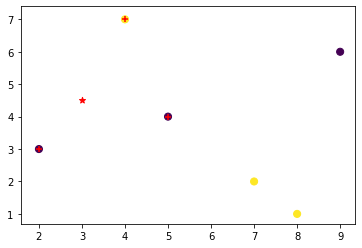

In [181]:
def simpleTest():
    data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
    label = [0, 0, 0, 1, 1, 1]
    kdtree = KNNKdTree()
    kdtree.fit(data, label)
    _, predict_label = kdtree.predict([3, 4.5])
    print("predict label:", predict_label)
    plot_knn_predict(kdtree, data, label, [3, 4.5])


simpleTest()

In [130]:
import random


def random_point(k):
    """
    产生一个k维随机向量，每维分量值在0~1之间
    """
    return [random.random() for _ in range(k)]


def random_points(k, n):
    """
    产生n个k维随机向量
    """
    return [random_point(k) for _ in range(n)]


def largeTest():
    N = 400000
    startTime = time.time()
    data = random_points(2, N)
    label = [0] * (N // 2) + [1] * (N // 2)
    kdtree2 = KNNKdTree()
    kdtree2.fit(data, label)
    _, predict_label = kdtree2.predict([0.1, 0.5])  # 四十万个样本点中寻找离目标最近的点

    print("time: %s" % round(time.time() - startTime, 5))
    print("predict label:", predict_label)


largeTest()

time: 78.01428
predict label: 0


In [134]:
def get_random_data(number):
    data = random_points(2, number)
    label = [0] * (number // 2) + [1] * (number // 2)
    return np.array(data), np.array(label)

In [135]:
def generate_kdtree_data():
    data_list = []
    label_list = []
    for num in [30, 500, 1000, 2000, 5000, 10000, 50000, 400000]:
        data, label = get_random_data(num)
        data_list.append(data)
        label_list.append(label)
    return data_list, label_list

In [138]:
data_list, label_list = generate_kdtree_data()
models = {"knn": KNN(), "kdtree": KNNKdTree()}
for data, label in zip(data_list, label_list):
    for name, model in models.items():
        startTime = time.time()
        model.fit(data, label)
        for i in range(5):
            model.predict([0.3, 0.2])
        print("model = %s, dataNum = %s, takeTime = %s" %
              (name, len(data), round(time.time() - startTime, 5)))

model = knn, dataNum = 30, takeTime = 0.94875
model = kdtree, dataNum = 30, takeTime = 0.00473
model = knn, dataNum = 500, takeTime = 0.02879
model = kdtree, dataNum = 500, takeTime = 0.00983
model = knn, dataNum = 1000, takeTime = 0.07055
model = kdtree, dataNum = 1000, takeTime = 0.02419
model = knn, dataNum = 2000, takeTime = 0.14436
model = kdtree, dataNum = 2000, takeTime = 0.03816
model = knn, dataNum = 5000, takeTime = 0.39336
model = kdtree, dataNum = 5000, takeTime = 0.17428
model = knn, dataNum = 10000, takeTime = 0.69411
model = kdtree, dataNum = 10000, takeTime = 0.24525
model = knn, dataNum = 50000, takeTime = 3.50796
model = kdtree, dataNum = 50000, takeTime = 1.9812
model = knn, dataNum = 400000, takeTime = 31.59755
model = kdtree, dataNum = 400000, takeTime = 25.12736


nearest [array([0.4557774 , 0.18873344]), array([0.27929259, 0.35877439]), array([0.21210032, 0.03044424])]


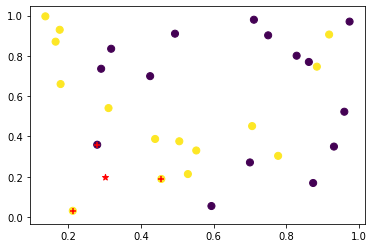

In [183]:
# data_list, label_list = generate_kdtree_data()
point = (0.3, 0.2)
model = KNNKdTree()
model.fit(data_list[0], label_list[0])
print(model)
plot_knn_predict(model, data_list[0], label_list[0], point)

https://github.com/SmallVagetable/machine_learning_python/blob/master/knn/KNN.ipynb

### BallTree 例子很少，有机会深刻研究